In [210]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs

In [211]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The dataset contains information about 506 houses in Boston, Massachusetts in the 1970s. Each house is described by 13 features, including:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV Median value of owner-occupied homes in $1000's


Here main thing to notice is that MEDV is the outcome variable which we need to predict and all other variables are predictor variables.



In [212]:
#Check the shape of dataframe
df.shape

(506, 14)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can see that all features in the dataset are numeric type either float or int. There is no categorical variable.


In [214]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [215]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [216]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [217]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

CRIM 0.0395  % missing values
ZN 0.0395  % missing values
INDUS 0.0395  % missing values
CHAS 0.0395  % missing values
AGE 0.0395  % missing values
LSTAT 0.0395  % missing values


In [218]:
# Check for missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [219]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [220]:
df = df.fillna(df.median())

In [221]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [222]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [223]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


In [224]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2


In [225]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

discrete_feature

Discrete Variables Count: 2


['CHAS', 'RAD']

In [226]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [227]:
df['CHAS'].value_counts()

0.0    472
1.0     34
Name: CHAS, dtype: int64

In [228]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

continuous_feature

Continuous feature Count 12


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

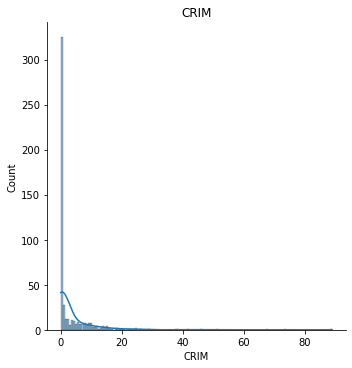

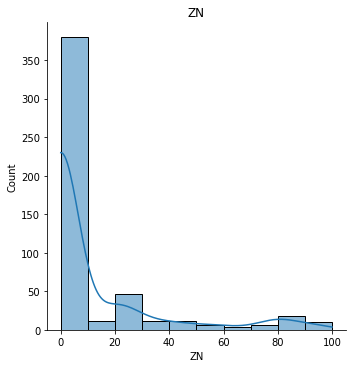

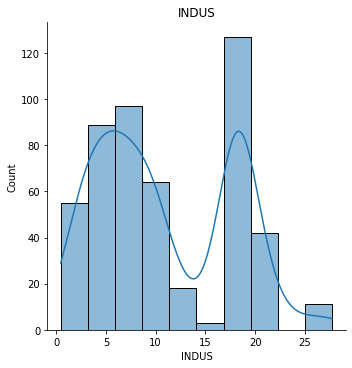

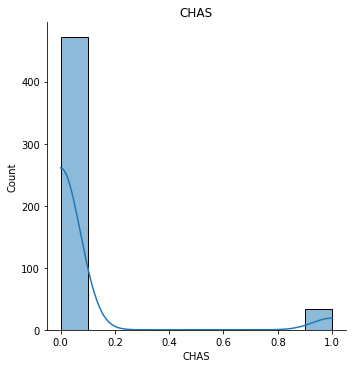

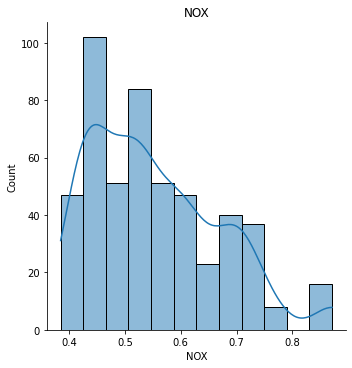

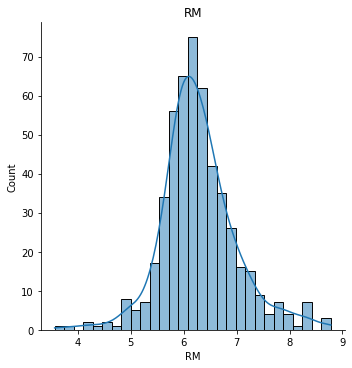

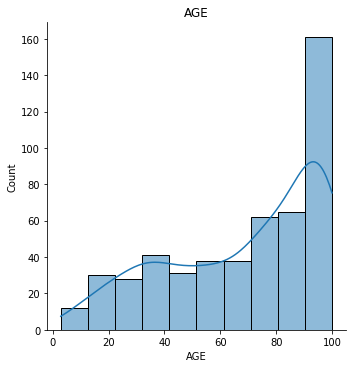

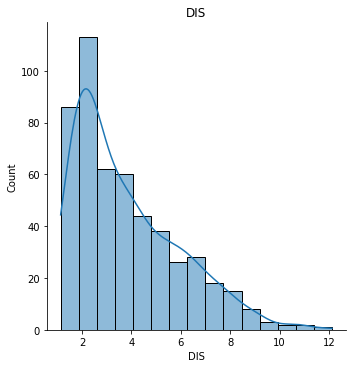

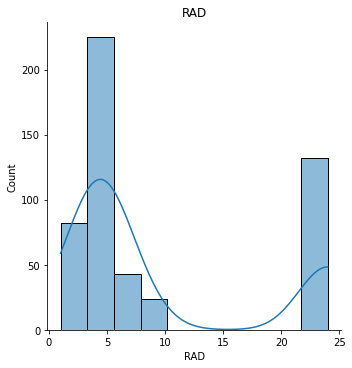

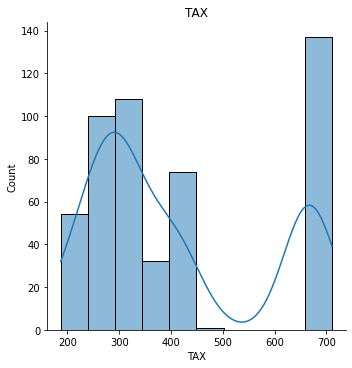

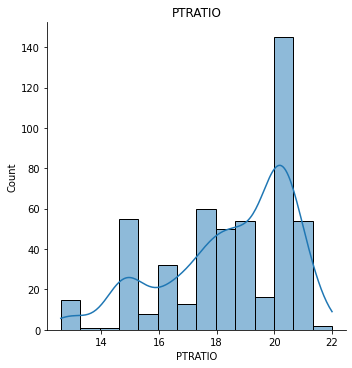

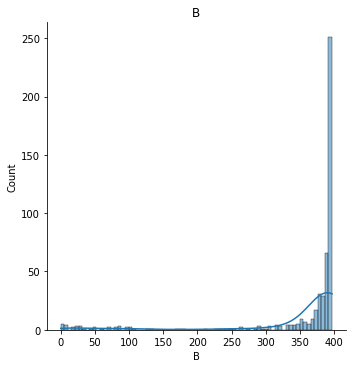

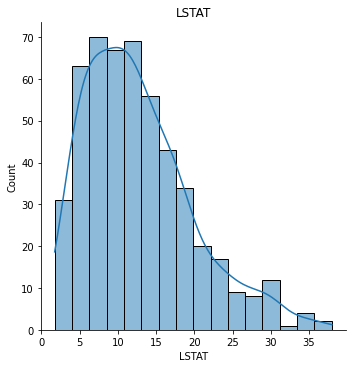

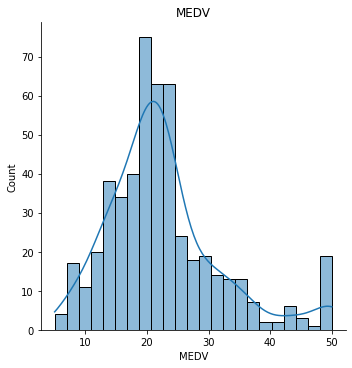

In [229]:


# Histograms of each feature
for feature in df.columns:
    sns.displot(df[feature], kde=True)
    plt.title(feature)
    plt.show()


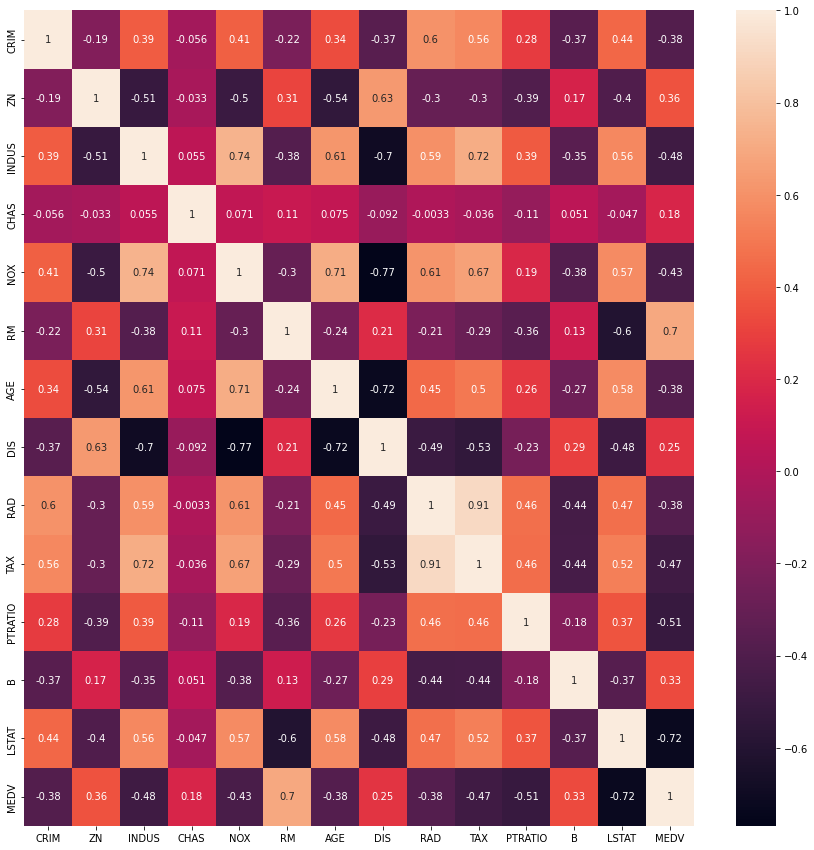

In [230]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV

I observed that INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV and I am interested to know more about them.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


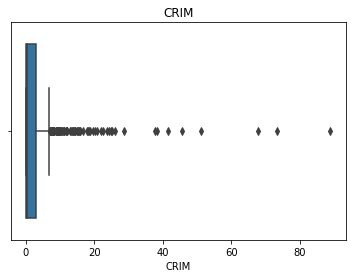

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


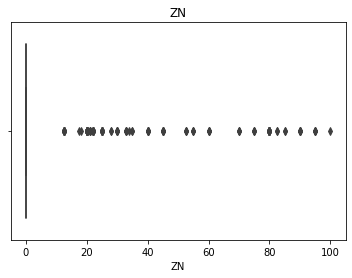

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


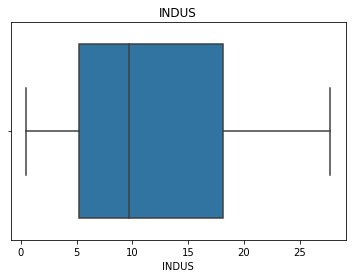

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


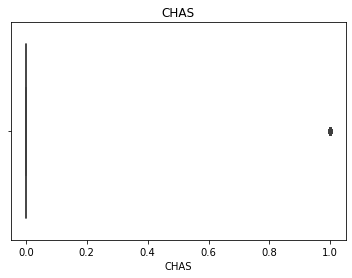

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


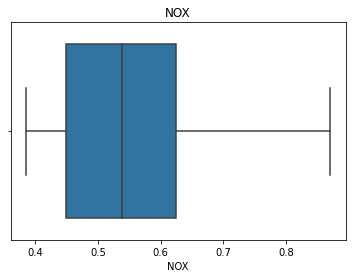

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


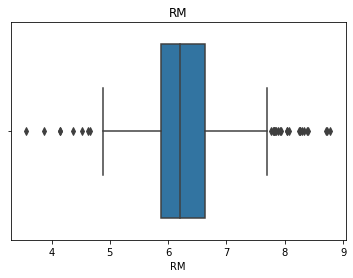

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


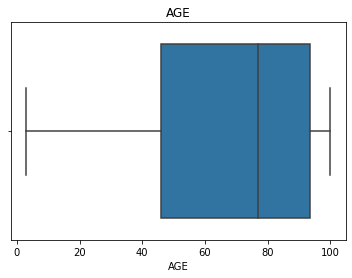

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


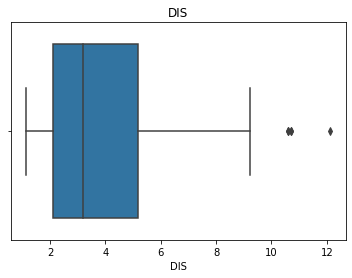

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


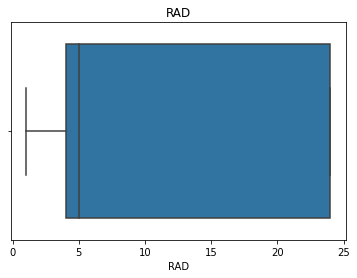

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


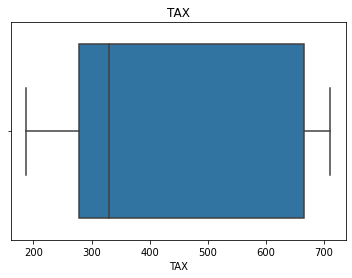

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


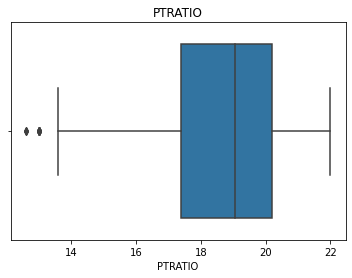

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


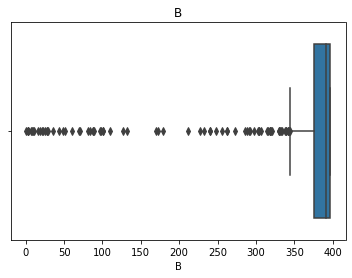

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


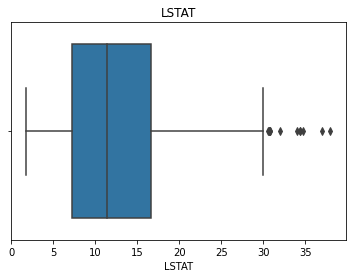

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


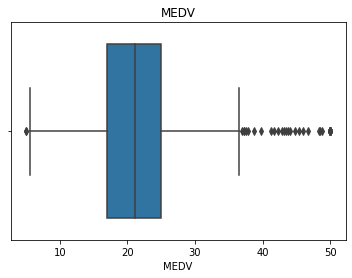

In [231]:
# Boxplots of each feature
for feature in df.columns:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()


In [232]:
df1 = df.copy()

In [233]:
import pandas as pd
import numpy as np





# Calculate the IQR for all features
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Determine the lower and upper bounds for all features
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers in the DataFrame
outliers = df[(df < lower_bound) | (df > upper_bound)].any(axis=1)

# Remove the outliers from the DataFrame
df = df[~outliers]

# Print the results
print("Original DataFrame shape:", df1.shape)
print("DataFrame shape after removing outliers:", df.shape)


Original DataFrame shape: (506, 14)
DataFrame shape after removing outliers: (217, 14)


In [234]:
#since some of these features shows quite good and very good correlation with our predictive variable Houese Price(MEDV)
df1 = df[['RM','TAX','PTRATIO','LSTAT','MEDV']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,11.43,36.2
5,6.430,222,18.7,5.21,28.7


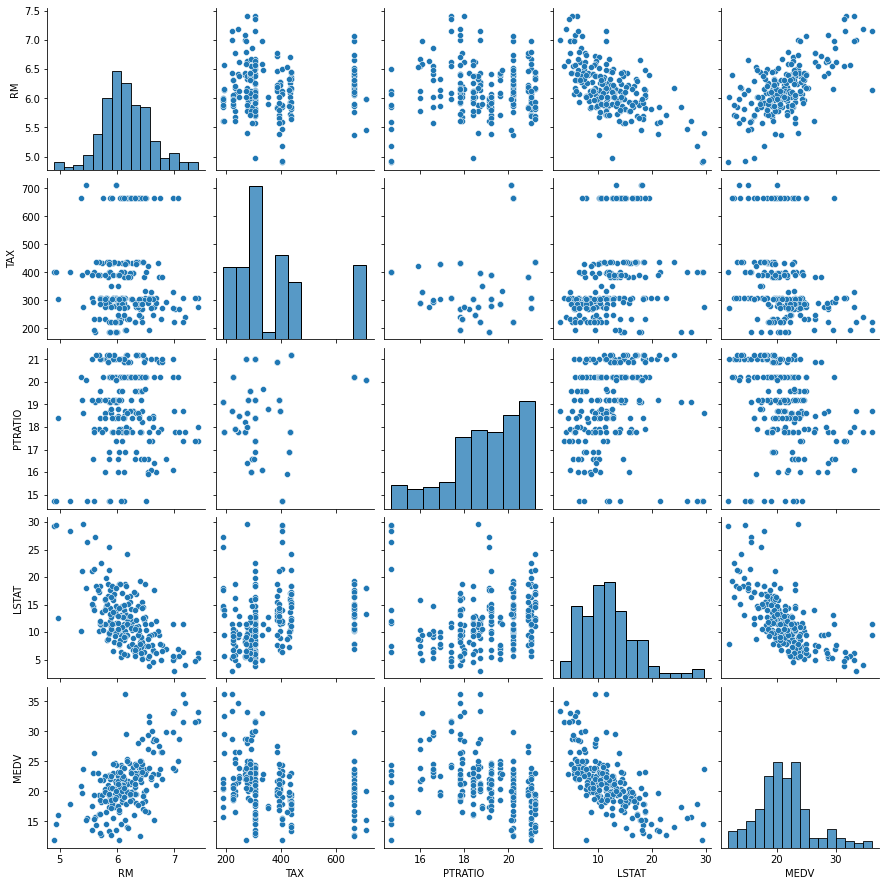

In [235]:
sns.pairplot(data=df1)

In [236]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [237]:
import numpy as np

from decision_tree_reg import DecisionTreeRegressor

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
      
       
        self.trees = []

    def fit(self, X, y):
     
          for i in range(self.n_estimators):
            
                indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
                X_subset = X[indices]
                y_subset = y[indices]
                tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                              min_samples_split=self.min_samples_split
                                             
                                              )
                tree.fit(X_subset, y_subset)
                self.trees.append(tree)
    def predict(self, X):
        y_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return np.mean(y_preds, axis=1)            
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
    
    
  


In [238]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [239]:

#column_s = ['LSTAT', 'NOX', 'PTRATIO', 'DIS', 'AGE', 'RM', 'TAX', 'INDUS','CHAS','ZN','CRIM','B','RAD']
#X = df.loc[:,column_s]
#y = df.iloc[:, -1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)

scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Standardize the data using the scaler
X_scaled = scaler.transform(X)



In [240]:
import random

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    
    n = len(X)
    test_data = set(random.sample(range(n), int(n * test_size)))
    train_data = set(range(n)) - test_data
    X_train = [X[i] for i in train_data]
    X_train=np.array(X_train)
    X_test = [X[i] for i in test_data]
    X_test=np.array(X_test)
    y_train = [y[i] for i in train_data]
    y_train=np.array(y_train)
    y_test = [y[i] for i in test_data]
    y_test=np.array(y_test)
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [241]:
import numpy as np
regressor = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2)
regressor.fit(X_train,y_train)


In [242]:
y_pred = regressor.predict(X_test)

In [243]:
y_pred

array([27.27462321, 22.83319462, 21.28093852, 21.28093852, 21.28093852,
       21.28093852, 21.28093852, 21.28093852, 21.28093852, 21.28093852,
       21.28093852, 21.28093852, 19.29378784, 21.28093852, 21.28093852,
       21.28093852, 22.83319462, 21.28093852, 20.87314632, 20.13979017,
       31.25326923, 21.28093852, 21.28093852, 21.28093852, 21.28093852,
       21.28093852, 26.7842611 , 20.76130485, 21.28093852, 21.28093852,
       20.49465647, 21.28093852, 21.28093852, 21.28093852, 21.28093852,
       21.28093852, 21.28093852, 17.52150027, 15.09969154, 14.78719154,
       21.28093852, 22.83319462, 21.28093852])

In [244]:
mean_squared_error(y_test, y_pred)


12.374289323477429

In [245]:

# Define the random forest regression function
def random_forest_reg(X_train, y_train, X_test, n_estimators, max_depth,min_samples_split):
  # Fit the random forest regression model
  tree_reg = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
  tree_reg.fit(X_train, y_train)
  
  # Make predictions on the test data
  y_pred = tree_reg.predict(X_test)
  
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  
  return mse

In [246]:
from sklearn.metrics import mean_squared_error

# Define the hyperparameter tuning function using randomized cross-validation
def random_search_cv(X_train, Y_train, X_test, param_dist, num_iter):
      # Define the best parameters and score
      best_params = {}
      best_score = np.inf

      # Perform the specified number of iterations
      for i in range(num_iter):
          # Select a random set of parameters
          params = {k: v[np.random.randint(len(v))] for k, v in param_dist.items()}

          # Evaluate the model with the selected parameters
          score = random_forest_reg(X_train, Y_train, X_test, **params)

          # Check if the model is the best so far
          if score < best_score:
              best_score = score
              best_params = params

      return best_params

# Define the hyperparameters and their possible values
param_dist = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40]
             } 


In [247]:
# Perform the hyperparameter tuning with randomized cross-validation
best_params = random_search_cv(X_train, y_train, X_test, param_dist, 5)

# Print the best parameters
print("Best parameters:", best_params)

# Fit the random forest regression model with the best parameters
tree_reg = RandomForestRegressor(**best_params)
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

Best parameters: {'n_estimators': 20, 'max_depth': 50, 'min_samples_split': 30}
Mean squared error: 9.180000263073307


In [248]:
import numpy as np
from itertools import product
from sklearn.metrics import mean_squared_error

class GridSearchCV:
    def __init__(self, model, params):
        self.model = model
        self.params = params

    def fit(self, X, y):
        best_params = None
        best_score = np.inf
        
        for params in product(*self.params.values()):
            model = self.model(*params)
            model.fit(X, y)
            y_pred = model.predict(X)
            score = mean_squared_error(y, y_pred)
            
            if score < best_score:
                best_score = score
                best_params = params
                
        self.best_params_ = dict(zip(self.params.keys(), best_params))
        self.best_score_ = best_score
        self.best_model_ = self.model(*best_params)
        self.best_model_.fit(X, y)

        return self

    def predict(self, X):
        return self.best_model_.predict(X)


In [249]:
params = { "n_estimators":[10, 20, 5],
              "max_depth": [1, 5, 10, 20, 50, 100],
              "min_samples_split": [2, 5, 10, 20,30,40]
             }


gscv = GridSearchCV(RandomForestRegressor, params)
gscv.fit(X, y)

print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)


Best parameters: {'n_estimators': 20, 'max_depth': 100, 'min_samples_split': 2}
Best score: 1.515097788332575
